## Investment Analysis for Spark Funds by Rajeev Badgujar

## Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Read the data

**companies** - the dataframe containing information of all the startups \
**rounds2** - the dataframe containing the information about each round of investments done in the companies \
**mapping** - maping of sector and the categories 

There seems to be some differences in the encoding of companies and round2 files. The default encoding (utf-8) used by read_csv method of pandas resulted in character differences in companies and round2 dataframes. After trying "mac_roman" and "Latin-1/iso-8859-1", the later seems to work better.

In [2]:
companies = pd.read_csv('companies.csv', encoding='iso-8859-1')
rounds2 = pd.read_csv('rounds2.csv', encoding='iso-8859-1')
mapping = pd.read_csv('mapping.csv', encoding='iso-8859-1')

## Describe the datasets

In [3]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [4]:
companies.tail()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/Organization/ÃEron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/ÃAsys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014
66367,/Organization/Ä°Novatiff-Reklam-Ve-Tanä±Tä±M-H...,Ä°novatiff Reklam ve TanÄ±tÄ±m Hizmetleri Tic,http://inovatiff.com,Consumer Goods|E-Commerce|Internet,operating,NaN,NaN,NaN,NaN,NaN


There are some non-ascii characters in the permalink and name columns. We need to remove these non-ascii characteres.

In [5]:
companies['permalink'] = companies['permalink'].str.encode('ascii', 'ignore').str.decode('ascii')
companies['name'] = companies['name'].str.encode('ascii', 'ignore').str.decode('ascii')

In [6]:
companies.tail()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/Organization/Eron,ERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/Asys-2,asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014
66367,/Organization/Novatiff-Reklam-Ve-TanTM-Hizmetl...,novatiff Reklam ve Tantm Hizmetleri Tic,http://inovatiff.com,Consumer Goods|E-Commerce|Internet,operating,NaN,NaN,NaN,NaN,NaN


The non-ascii characters are removed as we can see the special characters are removed from company name "Ä°novatiff Reklam ve TanÄ±tÄ±m Hizmetleri Tic". The cleaned name is **"novatiff Reklam ve Tantm Hizmetleri Tic"**

In [7]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [8]:
rounds2.tail()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/ORGANIZATION/ÃASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0
114948,/organization/ä°novatiff-reklam-ve-tanä±tä±m-h...,/funding-round/af942869878d2cd788ef5189b435ebc4,grant,NaN,01-10-2013,14851.0


The rounds2 dataframe also contains non-ascii characters in company_permalink column. We will remove these characters.

In [9]:
rounds2['company_permalink'] = rounds2['company_permalink'].str.encode('ascii', 'ignore').str.decode('ascii')

In [10]:
rounds2.tail()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/eron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/ORGANIZATION/ASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0
114948,/organization/novatiff-reklam-ve-tantm-hizmetl...,/funding-round/af942869878d2cd788ef5189b435ebc4,grant,NaN,01-10-2013,14851.0


In [11]:
print('companies dataframe shape -',companies.shape)
print('rounds2 dataframe shape -', rounds2.shape)

companies dataframe shape - (66368, 10)
rounds2 dataframe shape - (114949, 6)


## Checkpoint 1: Data Cleaning 1
We will now check each column in both the dataframes for null/NaN values.
### companies 
The dataframe has maximum number of null values in column **founded_at** followed by **state_code, region, city, country_code, homepage_url and category_list.**

In [12]:
companies.isnull().sum(axis=0)

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

Lets calculate the percentage of null values for each column companies dataframe

In [13]:
100*companies.isnull().sum()/len(companies.index)

permalink         0.000000
name              0.001507
homepage_url      7.621143
category_list     4.743250
status            0.000000
country_code     10.483968
state_code       12.878194
region           12.099204
city             12.096191
founded_at       22.934245
dtype: float64

From the columns with high null values - **country_code** and **category_list** are important for our analysis. We can drop other columns after merging the two datasets to keep the original companies and rounds2 data in tact.

### rounds2
Now lets calculate the same for rounds2 dataset.

In [14]:
100*rounds2.isnull().sum(axis=0)/len(rounds2.index)

company_permalink           0.000000
funding_round_permalink     0.000000
funding_round_type          0.000000
funding_round_code         72.909725
funded_at                   0.000000
raised_amount_usd          17.390321
dtype: float64

In rounds2 dataset two cloumns - **funding_round_code** and **raised_amount_usd** have high percentage of null values. Out of these two columns only **raised_amount_usd** is important for our analysis so we can **drop funding_round_code** column. 
We can tackle null values **raised_amount_usd** column in one of the following two ways 
1. remove all rows with null values
2. populate the null with median for respective funding type

We will take this decision after merging the frames.

The **permalink** column in companies dataframe and **company_permalink** in rounds2 dataframe have **case discrepancy**. We will convert everything in lower case. Also **rename the company_permalink to permalink** because later the merge is performed on this column.

In [15]:
rounds2.rename(columns={'company_permalink':'permalink'}, inplace=True)

In [16]:
companies['permalink'] = companies['permalink'].str.lower()
rounds2['permalink'] = rounds2['permalink'].str.lower()

In [17]:
companies.permalink.describe()

count                  66368
unique                 66368
top       /organization/sage
freq                       1
Name: permalink, dtype: object

In [18]:
rounds2.permalink.describe()

count                       114949
unique                       66368
top       /organization/solarflare
freq                            19
Name: permalink, dtype: object

We can take set difference between the columns of two dataframes to figure out the companies which are present in rounds2 dataframe but not in companies.

In [19]:
len(set(rounds2.permalink) - set(companies.permalink))

0

Create index on permalink columns of companies and round2 dataframes.

In [20]:
companies.set_index('permalink', inplace=True)
rounds2.set_index('permalink', inplace=True)

All the companies in rounds2 dataset are present in companies dataset.

In [21]:
master_frame = rounds2.merge(companies, how='left', on='permalink')

In [22]:
master_frame.head()

,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
permalink,,,,,,,,,,,,,,
/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [23]:
print('master_frame shape -', master_frame.shape)

master_frame shape - (114949, 14)


### Drop the columns with null values
As discssed earlier lets drop the columns
- homepage_url
- state_code
- region
- city
- founded_at
- funding_round_code

In [24]:
master_frame = master_frame.drop(['homepage_url', 'state_code', 'region', 'city', 'founded_at', 'funding_round_code'], 
                                 axis=1)

In [25]:
master_frame.isnull().sum()

funding_round_permalink        0
funding_round_type             0
funded_at                      0
raised_amount_usd          19990
name                           1
category_list               3410
status                         0
country_code                8678
dtype: int64

In [26]:
100*master_frame.isnull().sum()/len(master_frame.index)

funding_round_permalink     0.000000
funding_round_type          0.000000
funded_at                   0.000000
raised_amount_usd          17.390321
name                        0.000870
category_list               2.966533
status                      0.000000
country_code                7.549435
dtype: float64

### Drop rows with null data

Now lets revisit the **raised_amount_usd** column, this column has ~20k rows with null value. Another important column for our analysis is **country_code** which has about ~8.6k null records. Lets discuss about **country_code** first. 

In [27]:
master_frame.country_code.describe()

count     106271
unique       137
top          USA
freq       72308
Name: country_code, dtype: object

USA is the highest occuring country and there are 137 unique contry codes. Now lets calculate the percentage to understand the distribution properly.

In [28]:
100*master_frame.country_code.value_counts()/len(master_frame.index)

USA    62.904418
GBR     5.190128
CAN     2.709897
CHN     2.342778
IND     1.942601
         ...    
OMN     0.000870
DZA     0.000870
UZB     0.000870
MNE     0.000870
GGY     0.000870
Name: country_code, Length: 137, dtype: float64

In [29]:
master_frame.country_code.isnull().sum()

8678

We can populate null values with country code USA as about **~63%** of the data has USA as country_code. However with such high number of records for USA, adding **8.6k** will not add significant value to our analysis. So we can remove the rows with null country codes.

As 8.6k records we are removing anyways, this will remove some records with **raised_amount_usd** as null. This represents **~16%** of the data, so we can remove the records with null raised_amount_usd values. Also we are interested in top sectors which is least likely to be affected by removing the rows with raised_amount_usd null value. Lets start by removing the rows with country_code as null.

**Note: We discuss this in detail at the end of the notebook**

In [30]:
master_frame = master_frame[~master_frame.country_code.isna()]

In [31]:
100*master_frame.isnull().sum()/len(master_frame.index)

funding_round_permalink     0.000000
funding_round_type          0.000000
funded_at                   0.000000
raised_amount_usd          16.150220
name                        0.000941
category_list               1.636382
status                      0.000000
country_code                0.000000
dtype: float64

In [32]:
master_frame = master_frame[~master_frame.raised_amount_usd.isnull()]

In [33]:
100*master_frame.isnull().sum()/len(master_frame.index)

funding_round_permalink    0.000000
funding_round_type         0.000000
funded_at                  0.000000
raised_amount_usd          0.000000
name                       0.001122
category_list              0.649773
status                     0.000000
country_code               0.000000
dtype: float64

In [34]:
print('master_frame shape after removing rows with null raised_funding_usd -', master_frame.shape)

master_frame shape after removing rows with null raised_funding_usd - (89108, 8)


Now lets analyse the country_code as its important column for our analysis.

We can drop the records with category_list as null as its just 0.65% of total data. There are also very small number of records with name as null but we can live with it. 

In [35]:
master_frame = master_frame[~master_frame.category_list.isnull()]

In [36]:
100*master_frame.isnull().sum()/len(master_frame.index)

funding_round_permalink    0.00000
funding_round_type         0.00000
funded_at                  0.00000
raised_amount_usd          0.00000
name                       0.00113
category_list              0.00000
status                     0.00000
country_code               0.00000
dtype: float64

In [37]:
master_frame.reset_index(inplace=True)

In [38]:
master_frame.shape

(88529, 9)

## End of Checkpoint 1: Data Cleaning 1

------------------------------------------------------------

## Checkpoint 2: Funding Type Analysis

Now lets focus on the funding type analysis. The Spark Funds wants to 
- choose one of the 4 investment types 
  - venture
  - angel
  - seed
  - private equity
- invest between 5 to 15 million USD per investment round

Lets start by describing the raised_amount_usd column

In [39]:
master_frame.raised_amount_usd.describe()

count    8.852900e+04
mean     1.047385e+07
std      1.118118e+08
min      0.000000e+00
25%      3.705180e+05
50%      1.800000e+06
75%      7.100000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

There is huge difference between the min and max values. The mean is at about ~10.4 million which is more than the 75th quartile which is at about ~7.1 million.
Lets try to focus on the data pertaining to the four types of investment types and compare the mean, median numbers.

In [40]:
master_frame = master_frame[(master_frame['funding_round_type'] == 'angel') |
                            (master_frame['funding_round_type'] == 'venture') |
                            (master_frame['funding_round_type'] == 'seed') |
                            (master_frame['funding_round_type'] == 'private_equity')]

In [41]:
master_frame.funding_round_type.value_counts()

venture           47809
seed              21095
angel              4400
private_equity     1820
Name: funding_round_type, dtype: int64

In [42]:
master_frame.raised_amount_usd.describe()

count    7.512400e+04
mean     9.519475e+06
std      7.792778e+07
min      0.000000e+00
25%      4.705852e+05
50%      2.000000e+06
75%      8.000000e+06
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

Lets plot a boxplot for each investment types to get an idea of the spread of the data.

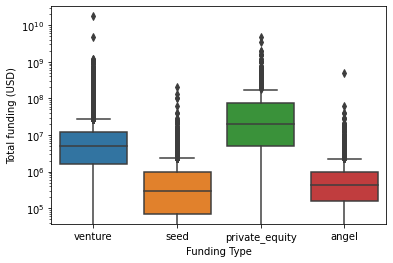

In [43]:
sns.boxplot(y=master_frame['raised_amount_usd'], x=master_frame['funding_round_type'])
plt.ylabel('Total funding (USD)')
plt.xlabel('Funding Type')
plt.yscale('log')
plt.show()

There are quite a few outliers for each type investment type. The mean for each type is more than the 75th quartile. Lets create a pivote table of funding type and the mean and median amount invested. 

In [44]:
pd.pivot_table(data=master_frame, columns='funding_round_type', values='raised_amount_usd', aggfunc=[np.median, np.mean])

median                                      \
funding_round_type     angel private_equity      seed    venture   
raised_amount_usd   414906.0     20000000.0  300000.0  5000000.0   

                             mean                                              
funding_round_type          angel private_equity           seed       venture  
raised_amount_usd   971573.891136   7.393849e+07  747793.682484  1.172422e+07

As we can see that there is big difference between mean and median for each type of funding and from the boxplot we can see that there are outliers for each funding type we should consider median as representative value for funding types. 

From the boxplot 
- the median of venture funding is 5 million and the mean is ~11.7 million. Both these numbers are within the targeted investment amount of Spark Funds.
- the median of seed funding is 300000 and the mean is ~747793. Both these numbers are way below the desired investment amount of Spark Funds
- the median of angel funding is 414906 and the mean is ~971573. Again both these numbers are less than the Spark Funds targeted investment amount
- the median of private equity is 20 million and the mean is ~73.93 million. Both these amounts are more than the Spark Funds investment targets

**The venture investment type should be considered by Spark Funds.**

## End of Checkpoint 2: Funding Type Analysis

------------------------------------------------------------------------------------

## Checkpoint 3: Country Analysis

Spark Funds wants to invest in 
- countries with highest funding received in venture type
- English speaking countries

Now that we have established vensture as preferred investment type, lets filter master_frame to only contain venture type data.

In [45]:
top9 = master_frame[master_frame.funding_round_type == 'venture'].pivot_table(index='country_code', 
                                                                              values='raised_amount_usd', aggfunc=np.sum)
top9 = top9.sort_values(by='raised_amount_usd', ascending=False).iloc[:9, ]
top9

,raised_amount_usd
country_code,
USA,4.200680e+11
CHN,3.933892e+10
GBR,2.007281e+10
IND,1.426151e+10
CAN,9.482218e+09
FRA,7.226851e+09
ISR,6.854350e+09
DEU,6.306922e+09
JPN,3.167647e+09


In terms of total funding amount USA tops the list with ~420 billion USD followed by China with ~39 billion USD and Great Britain with ~20 billion. \
But as China is not English speaking country, Spark Funds should consder below top 3 investment friendly countries for venture funding 
1. **USA : ~420 billion USD**
2. **Great Britan : ~20 billion USD**
3. **India : ~14.2 billion USD**

Lets filter master_frame with data for top three countries.

## End of Checkpoint 3: Country Analysis

------------------------------------------------------------------------------------------------------------

## Checkpoint 4: Sector Analysis 1

As the category_list can contain multiple categories separated by '|', we need to extract primary sector from category list.

In [46]:
master_frame['category_list'] = master_frame.category_list.apply(lambda x: x.split('|')[0])

Lets analyse the mapping data for null values.

In [47]:
mapping.category_list.isna().sum()

1

In [48]:
master_frame.category_list.isna().sum()

0

The category list in mapping data contains one NaN value bur the master frame does not contain any NaN for primary sector so we will drop the row from mapping with NaN category.

In [49]:
mapping = mapping[~mapping.category_list.isna()]

In [50]:
mapping.category_list.isna().sum()

0

In [51]:
mapping.category_list.describe()

count                         687
unique                        687
top       New Product Development
freq                            1
Name: category_list, dtype: object

The category_list has all unique values so lets set index on category_list

In [52]:
set(mapping.category_list).difference(master_frame.category_list)

{'0notechnology',
 '0tural Language Processing',
 '0tural Resources',
 '0vigation',
 'A0lytics',
 'Alter0tive Medicine',
 'Big Data A0lytics',
 'Business A0lytics',
 'Can0bis',
 'Career Ma0gement',
 'Chi0 Internet',
 'Cloud Ma0gement',
 'Contact Ma0gement',
 'Digital Rights Ma0gement',
 'Digital Sig0ge',
 'Document Ma0gement',
 'Educatio0l Games',
 'Energy Ma0gement',
 'Energy Storage',
 'Event Ma0gement',
 'Fi0nce',
 'Fi0nce Technology',
 'Fi0ncial Exchanges',
 'Fi0ncial Services',
 'Film Distribution',
 'Fleet Ma0gement',
 'Flowers',
 'Fmcg',
 'Gover0nce',
 'IT Ma0gement',
 'Identity Ma0gement',
 'Innovation Ma0gement',
 'Intellectual Asset Ma0gement',
 'Investment Ma0gement',
 'Jour0lism',
 'Knowledge Ma0gement',
 'Lead Ma0gement',
 'Lotteries',
 'Low Bid Auctions',
 'Medical Professio0ls',
 'Mobile A0lytics',
 'Multi-level Marketing',
 'Performance Marketing',
 'Perso0l Branding',
 'Perso0l Data',
 'Perso0l Fi0nce',
 'Perso0l Health',
 'Perso0lization',
 'Pervasive Computing',
 'Pl

It looks like the mapping dataframe has Na/na in category_list replaced with 0. Lets correct this. 

Below method replaces 0 with either Na or na based on index position of 0.

In [53]:
def replace_0_with_n(x):
    if x[0] == '0':
        x = x.replace('0', 'Na')
    elif x.find('.0') == -1:
        x = x.replace('0', 'na')
    return x

In [54]:
mapping['category_list'] = mapping.category_list.apply(replace_0_with_n)

The mapping dataframe has category as row and main sector as columns. The category to sector relationship is denited with an integer value of 1 in sector column. The format of mapping dataframe is difficult to work with so we will add an extra column in the mapping dataframe with name of the sector. \
Use melt() function of pandas to unpivot the sector column.

In [55]:
mapping = pd.melt(mapping, id_vars =['category_list'], value_vars =['Manufacturing','Automotive & Sports',
                                                              'Cleantech / Semiconductors','Entertainment',
                                                             'Health','News, Search and Messaging','Others',
                                                             'Social, Finance, Analytics, Advertising']) 
mapping = mapping[~(mapping.value == 0)]
mapping = mapping.drop('value', axis = 1)
mapping = mapping.rename(columns = {"variable":"sector"})
mapping.head()

,category_list,sector
0,3D,Manufacturing
1,3D Printing,Manufacturing
2,3D Technology,Manufacturing
6,Advanced Materials,Manufacturing
14,Agriculture,Manufacturing


In [56]:
master_frame = master_frame.merge(mapping, how='left', on='category_list')

In [57]:
master_frame.head()

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,Media,operating,IND,Entertainment
1,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,:Qounter,Application Platforms,operating,USA,"News, Search and Messaging"
2,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,0-6.com,Curated Web,operating,CHN,"News, Search and Messaging"
3,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0,Ondine Biomedical Inc.,Biotechnology,operating,CAN,Cleantech / Semiconductors
4,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,Ondine Biomedical Inc.,Biotechnology,operating,CAN,Cleantech / Semiconductors


In [58]:
mapping.sector.describe()

count        687
unique         8
top       Others
freq         195
Name: sector, dtype: object

In [59]:
master_frame.category_list.describe()

count             75124
unique              695
top       Biotechnology
freq               7630
Name: category_list, dtype: object

The master_frame contains 695 unique values of primary sector whereas mapping contains 687 categories. So lets figure put what is missing.

In [60]:
diff = set(mapping.category_list).difference(master_frame.category_list)
print(diff)
print('The difference in category_list between mapping and master_frame is ', len(diff))

{'Women', 'Fmcg', 'Lotteries', 'Taxis', 'Film Distribution', 'Energy Storage', 'Pervasive Computing', 'Plumbers', 'Renewable Tech', 'Smart Grid', 'Multi-level Marketing', 'Performance Marketing', 'Flowers', 'Social Recruiting', 'Social Business', 'Low Bid Auctions', 'Veterinary', 'Virtual Workforces'}
The difference in category_list between mapping and master_frame is  18


In [61]:
master_frame[master_frame.sector.isnull()].category_list.unique()

array(['Cause Marketing', 'English-Speaking', 'Toys', 'Generation Y-Z',
       'Enterprise Hardware', 'Social Media Advertising',
       'Natural Gas Uses', 'Internet Technology', 'Nightlife',
       'Adaptive Equipment', 'Skill Gaming', 'Racing', 'Specialty Retail',
       'Registrars', 'Internet TV', 'Biotechnology and Semiconductor',
       'Vacation Rentals', 'Rapidly Expanding', 'Kinect',
       'Product Search', 'GreenTech', 'Retirement',
       'Subscription Businesses', 'Sponsorship',
       'Deep Information Technology', 'Golf Equipment'], dtype=object)

In [62]:
len(master_frame[master_frame.sector.isnull()])

38

In [63]:
master_frame.isnull().sum()

permalink                   0
funding_round_permalink     0
funding_round_type          0
funded_at                   0
raised_amount_usd           0
name                        1
category_list               0
status                      0
country_code                0
sector                     38
dtype: int64

Drop all the rows with null sector value

In [64]:
master_frame = master_frame[~(master_frame.sector.isnull())]

In [65]:
master_frame.shape

(75086, 10)

## End of Checkpoint 4: Sector Analysis 1

-------------------------------------------------------------------------------------------------------------

## Checkpoint 5: Sector Analysis 2

We are interested in venture type funding in the range of 5 to 15 million for top 3 investment friendly countries i.e USA, Great Britain and India. So lets first filter the data based on investment type venture and raised amount range of 5 million to 15 million.

In [66]:
venture_funding_5to15_million = master_frame[(master_frame.funding_round_type == 'venture') 
                                             & (master_frame.raised_amount_usd >= 5000000) 
                                             & (master_frame.raised_amount_usd <= 15000000)]

In [67]:
venture_funding_5to15_million.raised_amount_usd.describe()

count    1.577000e+04
mean     8.891387e+06
std      3.058761e+06
min      5.000000e+06
25%      6.000000e+06
50%      8.294612e+06
75%      1.100000e+07
max      1.500000e+07
Name: raised_amount_usd, dtype: float64

In [68]:
USA = venture_funding_5to15_million[venture_funding_5to15_million.country_code == 'USA']

In [69]:
USA.raised_amount_usd.count()

12063

In [70]:
USA.raised_amount_usd.sum()

107757097294.0

USA has seen **12063** investments and total sum of money raised is USD 55283488267 i.e. **~107.75 billion USD.**

In [71]:
GBR = venture_funding_5to15_million[venture_funding_5to15_million.country_code == 'GBR']

In [72]:
GBR.raised_amount_usd.count()

621

In [73]:
GBR.raised_amount_usd.sum()

5379078691.0

Great Britain has received **621** number of investments and total money raised is USD 3019748480 i.e. **~5.38 billion.**

In [74]:
IND = venture_funding_5to15_million[venture_funding_5to15_million.country_code == 'IND']

In [75]:
IND.raised_amount_usd.count()

328

In [76]:
IND.raised_amount_usd.sum()

2949543602.0

India has seen **328** number of investments and total money raised is USD 10254898437 i.e. **~2.94 billion.**

According to the sum of money raised and the number of investments, the ranking of investment friendly countries are 
- **USA ranks first** with **~107.75 billion USD** funding in **12063** investments 
- **Great Britain ranks second** with **~5.38 billion USD** funding in **621** investments 
- **India ranks third** with **~2.94 billion USD** funding in **328** investments 

### Top 3 Sector Analysis

#### Top 3 Sectors for each investment friendly country

In [77]:
usa_sector_group_by = USA.groupby(by='sector')

usa_sector_group_by.raised_amount_usd.count().sort_values(ascending=False)

sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
News, Search and Messaging                 1583
Health                                      909
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Name: raised_amount_usd, dtype: int64

In [78]:
gbr_sector_group_by = GBR.groupby(by='sector')

gbr_sector_group_by.raised_amount_usd.count().sort_values(ascending=False)

sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: raised_amount_usd, dtype: int64

In [79]:
ind_sector_group_by = IND.groupby(by='sector')

ind_sector_group_by.raised_amount_usd.count().sort_values(ascending=False)

sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: raised_amount_usd, dtype: int64

For all the top countries, one of the top sector is 'Others'. This seems like a catch all sector category and thus  does not help make definite decisions. Lets analyse the different categories that fall under this sector to understand it better.

In [80]:
mapping.groupby('sector').category_list.count()

sector
Automotive & Sports                         22
Cleantech / Semiconductors                  53
Entertainment                               89
Health                                      63
Manufacturing                               40
News, Search and Messaging                  72
Others                                     195
Social, Finance, Analytics, Advertising    153
Name: category_list, dtype: int64

In [81]:
print(set(mapping[mapping.sector == 'Others'].category_list.to_list()))

{'Online Education', 'Oil & Gas', 'Training', 'Families', 'Technology', 'Human Computer Interaction', 'Enterprise Security', 'Shipping', 'Guides', 'Online Identity', 'Parenting', 'Law Enforcement', 'Supply Chain Management', 'Document Management', 'iOS', 'Homeless Shelter', 'Kids', 'Gift Card', 'Loyalty Programs', 'Small and Medium Businesses', 'Intellectual Property', 'Landscaping', 'IT and Cybersecurity', 'Micro-Enterprises', 'EdTech', 'Shared Services', 'Systems', 'Universities', 'User Experience Design', 'Web Development', 'Politics', 'QR Codes', 'Telecommunications', 'Alumni', 'Entrepreneur', 'Human Resource Automation', 'University Students', 'Life Sciences', 'Hospitality', 'Usability', 'Skill Assessment', 'Fleet Management', 'IaaS', 'High Tech', 'Identity', 'Field Support Services', 'Gay & Lesbian', 'Lead Management', 'SNS', 'User Interface', 'Local Commerce', 'ICT', 'Mobile Security', 'Logistics', 'Taxis', 'Optimization', 'Interest Graph', 'Legal', 'Match-Making', 'Real Time', 

The Other sector contains 195 sub sectors or categories. It looks like this is a catch all category added which makes it uncertain about the type of companies one would invest. 

In [82]:
venture_funding_5to15_million[venture_funding_5to15_million.sector == 'Others'].category_list.value_counts().head(10)

Software               1319
Enterprise Software     733
E-Commerce              514
Security                250
Web Hosting             200
Education               108
EdTech                   70
Hospitality              57
Technology               53
Real Estate              43
Name: category_list, dtype: int64

These are top 10 primary sectors under Others category. These are very diverse categories put into a single sector. The real estate, education, e-commerce, hospitality are all very different sectors. Therefore the sector Others does not help in our analysis and also we are not very confident about the decision involving Others sector given its generic nature. So we will ignore the Others sector and pick next top sector instead.

Below are the top three sectors for each country after skipping sector Others : 

Top 3 sectors in USA
1. **Social, Finance, Analytics, Advertising  -   2714 investments**
2. **Cleantech / Semiconductors               -   2350 investments**
3. **News, Search and Messaging               -   1583 investments**

Top 3 sectors in Britain 
1. **Social, Finance, Analytics, Advertising  -  133 investments**
2. **Cleantech / Semiconductors               -  130 investments**
3. **News, Search and Messaging               -   73 investments**

Top 3 sectors in India
1. **Social, Finance, Analytics, Advertising  -   60 investments**
2. **News, Search and Messaging               -   52 investments**
3. **Entertainment                            -   33 investments**

#### Top companies for top two sectors for each country

For USA top sector is **Social, Finance, Analytics, Advertising** followed by **Cleantech / Semiconductors**. Lets count the values of names for each top two sectors in USA data.

In [83]:
USA[(USA.sector == 'Social, Finance, Analytics, Advertising')].groupby('name').raised_amount_usd.sum().sort_values(
    ascending=False).head()

name
SST Inc. (Formerly ShotSpotter)    67933006.0
Demandbase                         63000000.0
Intacct                            61800000.0
NetBase Solutions                  60600000.0
Lotame                             59700000.0
Name: raised_amount_usd, dtype: float64

In [84]:
USA[(USA.sector == 'Cleantech / Semiconductors')].groupby('name').raised_amount_usd.sum().sort_values(ascending=False).head()

name
Biodesix                 75300000.0
Tigo Energy              68739496.0
ForSight Labs            61300001.0
Cambrios Technologies    56891022.0
Rheonix                  56124758.0
Name: raised_amount_usd, dtype: float64

For Great Britain top sector is **Social, Finance, Analytics, Advertising** followed by **Cleantech / Semiconductors**. Lets count the values of names for each top two sectors in Great Britain data.

In [85]:
GBR[GBR.sector == 'Social, Finance, Analytics, Advertising'].groupby('name').raised_amount_usd.sum().sort_values(
    ascending=False).head()

name
Celltick Technologies    37500000.0
myThings                 34000000.0
Zopa                     32900000.0
VisualDNA                28550000.0
MarketInvoice            25553007.0
Name: raised_amount_usd, dtype: float64

In [86]:
GBR[GBR.sector == 'Cleantech / Semiconductors'].groupby('name').raised_amount_usd.sum().sort_values(ascending=False).head()

name
EUSA Pharma                     35600000.0
Horizon Discovery               31353719.0
F-star Biotechnology Limited    29132906.0
Elixent                         25000000.0
Takeda Cambridge                22340000.0
Name: raised_amount_usd, dtype: float64

The company name ESUA Pharma seems a bit odd for the Cleantech / Semiconductors sector. Lets cross verify from mapping data the category and sector it belongs to.

In [87]:
GBR[GBR.name == 'EUSA Pharma']

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,sector
21838,/organization/eusa-pharma,/funding-round/09af5eff34608eac27040925565f57e6,venture,19-07-2005,13970000.0,EUSA Pharma,Biotechnology,acquired,GBR,Cleantech / Semiconductors
21839,/organization/eusa-pharma,/funding-round/1a680e99bceab2d32fc6dc4c9406010a,venture,28-06-2007,9100000.0,EUSA Pharma,Biotechnology,acquired,GBR,Cleantech / Semiconductors
21841,/organization/eusa-pharma,/funding-round/f2a769a1468c2d4a8585e8abf31ef2ed,venture,13-12-2005,12530000.0,EUSA Pharma,Biotechnology,acquired,GBR,Cleantech / Semiconductors


In [88]:
mapping[mapping.category_list == 'Biotechnology']

,category_list,sector
1439,Biotechnology,Cleantech / Semiconductors


The category Biotechnology is indeed falls under Cleantech and Semiconductors sector, so we are good here. \
Lets move to the next category for Great Britain.

For India top sector is **Social, Finance, Analytics, Advertising** followed by **News, Search and Messaging**. Lets count the values of names for each top two sectors in India data.

In [89]:
IND[IND.sector == 'Social, Finance, Analytics, Advertising'].groupby('name').raised_amount_usd.sum().sort_values(
    ascending=False).head()

name
Manthan Systems               50700000.0
Komli Media                   28000000.0
ShopClues.com                 25000000.0
inTarvo                       21900000.0
Grameen Financial Services    21556050.0
Name: raised_amount_usd, dtype: float64

In [90]:
IND[IND.sector == 'News, Search and Messaging'].groupby('name').raised_amount_usd.sum().sort_values(ascending=False).head()

name
GupShup        33000000.0
IMImobile      23000000.0
SMS GupShup    22000000.0
hike           21000000.0
Roadrunnr      21000000.0
Name: raised_amount_usd, dtype: float64

## End of Checkpoint 5: Sector Analysis 2

---------------------------------------------------------------------------------------------------------------

## Checkpoint 6: Plots

### Plot showing the representative amount of investment in each funding type

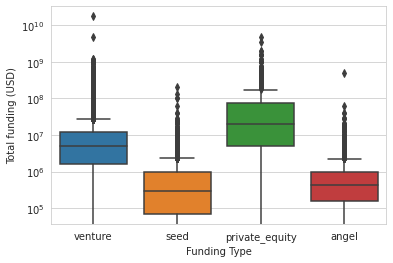

In [91]:
sns.set_style("whitegrid")
sns.boxplot(y=master_frame['raised_amount_usd'], x=master_frame['funding_round_type'])
plt.ylabel('Total funding (USD)')
plt.xlabel('Funding Type')
plt.yscale('log')
plt.show()

### Plot showing the top 9 countries against the total amount of investments of funding type venture

In [92]:
groupby_country = master_frame[master_frame.funding_round_type == 'venture'].groupby(by='country_code')
top9_country_codes = groupby_country.raised_amount_usd.sum().sort_values(ascending=False).head(9).index

top9_country_codes = [tuple(i) for i in top9_country_codes.values]
top9 = master_frame[master_frame['country_code'].apply(tuple).isin(top9_country_codes)]
top9 = top9[top9.funding_round_type == 'venture']

top9['preferrred_country'] = top9.country_code.isin(['USA', 'GBR', 'IND']).apply(lambda x: 'Yes' if x else 'No')

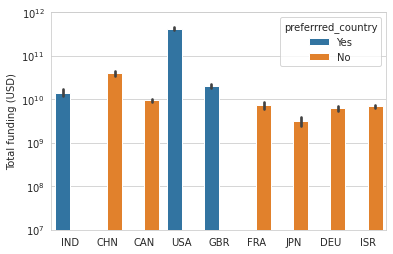

In [93]:
sns.set_style("whitegrid")
sns.barplot(data=top9, x=top9.country_code, y=top9.raised_amount_usd, estimator=np.sum, hue='preferrred_country')
plt.ylabel('Total funding (USD)')
plt.xlabel('')
plt.ylim(10000000, 1000000000000)
plt.yscale('log')
plt.show()

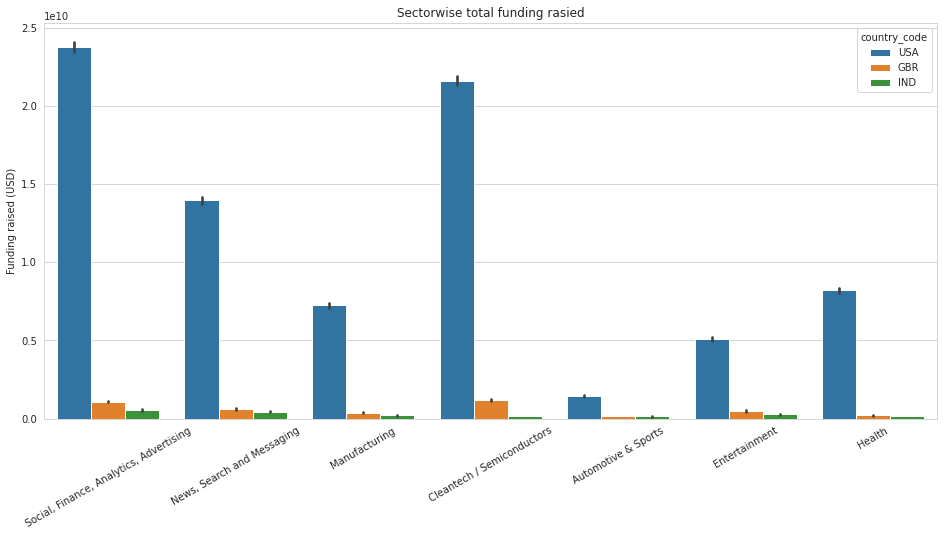

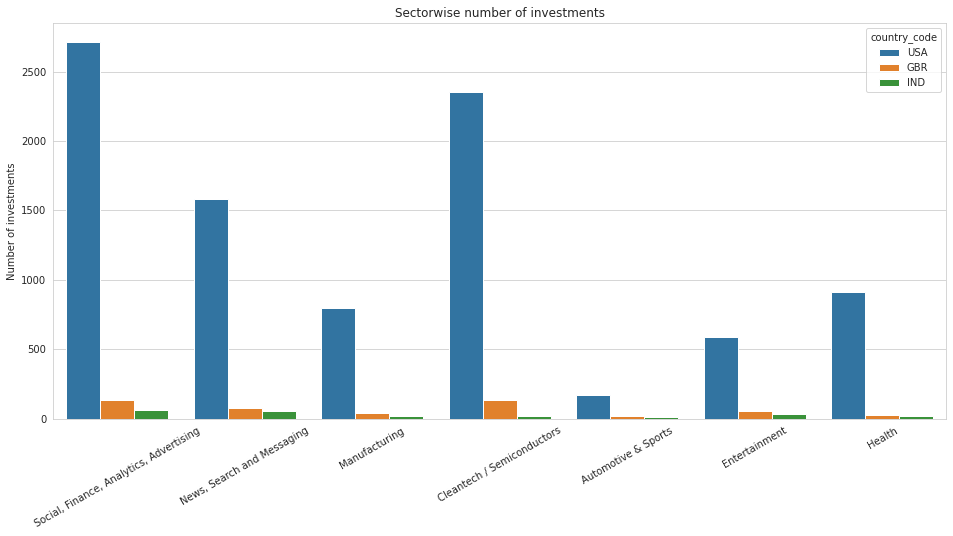

In [94]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 16))
plt.subplot(2, 1, 1)
top3_countries = USA.append(GBR).append(IND)
sector_to_raised_money = sns.barplot(data=top3_countries[top3_countries.sector != 'Others'], 
                                     x='sector', y='raised_amount_usd', hue='country_code', estimator=np.sum)
sector_to_raised_money.set_xticklabels(sector_to_raised_money.get_xticklabels(), rotation=30)
plt.ylabel('Funding raised (USD)')
plt.xlabel('')
plt.title("Sectorwise total funding rasied")
plt.show()

plt.figure(figsize=(16, 16))
plt.subplot(2, 1, 2)
sector_to_num_investment = sns.countplot(data=top3_countries[top3_countries.sector != 'Others'],
                                        x='sector', hue='country_code')
sector_to_num_investment.set_xticklabels(sector_to_num_investment.get_xticklabels(), rotation=30)
plt.ylabel('Number of investments')
plt.xlabel('')
plt.title("Sectorwise number of investments")
plt.show()

## End of Checkpoint 6: Plots

-----------------------------------------------------------------------------------------------------------------

In datacleaning section I reasoned that we can drop the rows with raised_funding_usd value null as it is not significant number. There I also mentioned that isnead of removing rows we can populate it with the median for respective funding type. 

In this section lets try to validate our initial assumption of dropping the rows by keeping those rows and populating it with median values. We will refer this as ApporachMedian and the original approach as ApproachDropNull.

As we already have companies, rounds2, mapping, master_frame, top9, USA, GBR, IND dataframes, lets not use them and here we will create separate dataframes by appending 1 at the end.

In [95]:
#Read data
companies1 = pd.read_csv('companies.csv', encoding='iso-8859-1')
rounds21 = pd.read_csv('rounds2.csv', encoding='iso-8859-1')
mapping1 = pd.read_csv('mapping.csv', encoding='iso-8859-1')
#Remove non-ascii
companies1['permalink'] = companies1['permalink'].str.encode('ascii', 'ignore').str.decode('ascii')
companies1['name'] = companies1['name'].str.encode('ascii', 'ignore').str.decode('ascii')
rounds21['company_permalink'] = rounds21['company_permalink'].str.encode('ascii', 'ignore').str.decode('ascii')
#Rename company_permalink
rounds21.rename(columns={'company_permalink':'permalink'}, inplace=True)
#Convert permalink to lowercase
companies1['permalink'] = companies1['permalink'].str.lower()
rounds21['permalink'] = rounds21['permalink'].str.lower()
#Set index on permalink
companies1.set_index('permalink', inplace=True)
rounds21.set_index('permalink', inplace=True)
#Merge companies1 and rounds21 as master_frame1
master_frame1 = rounds21.merge(companies1, how='left', on='permalink')
#Drop unused columns
master_frame1 = master_frame1.drop(['homepage_url', 'state_code', 'region', 'city', 'founded_at', 'funding_round_code'], 
                                   axis=1)
#Populate raised_amount_usd for seed type with its median
master_frame1['raised_amount_usd'] = master_frame1.apply(
    lambda row: 275000 if ((np.isnan(row['raised_amount_usd'])) & (row['funding_round_type'] == 'seed')) 
                       else row['raised_amount_usd'], axis=1)
#Populate raised_amount_usd for venture type with its median
master_frame1['raised_amount_usd'] = master_frame1.apply(
    lambda row: 5000000 if ((np.isnan(row['raised_amount_usd'])) & (row['funding_round_type'] == 'venture')) 
                       else row['raised_amount_usd'], axis=1)
#Populate raised_amount_usd for private_equity type with its median
master_frame1['raised_amount_usd'] = master_frame1.apply(
    lambda row: 20000000 if ((np.isnan(row['raised_amount_usd'])) & (row['funding_round_type'] == 'private_equity')) 
                       else row['raised_amount_usd'], axis=1)
#Populate raised_amount_usd for angel type with its median
master_frame1['raised_amount_usd'] = master_frame1.apply(
    lambda row: 400000 if ((np.isnan(row['raised_amount_usd'])) & (row['funding_round_type'] == 'angel')) 
                       else row['raised_amount_usd'], axis=1)
#Drop rows with null values 
master_frame1 = master_frame1[~master_frame1.raised_amount_usd.isnull()]
master_frame1 = master_frame1[~master_frame1.country_code.isna()]
master_frame1 = master_frame1[~master_frame1.category_list.isnull()]

master_frame1.reset_index(inplace=True)
#Filter master_frame1 for 4 investment types
master_frame1 = master_frame1[(master_frame1['funding_round_type'] == 'seed') |
                              (master_frame1['funding_round_type'] == 'venture') |
                              (master_frame1['funding_round_type'] == 'private_equity') |
                              (master_frame1['funding_round_type'] == 'angel')]

In [96]:
pd.pivot_table(data=master_frame1, columns='funding_round_type', values='raised_amount_usd', aggfunc=[np.median, np.mean])

median                                      \
funding_round_type     angel private_equity      seed    venture   
raised_amount_usd   400000.0     20000000.0  275000.0  5000000.0   

                            mean                                              
funding_round_type         angel private_equity           seed       venture  
raised_amount_usd   864265.29832   6.777034e+07  652244.221651  1.117942e+07

Here we can see the mean values for each investment type is reduced as compared to ApproachDropNull.

In [97]:
top91 = master_frame1[master_frame1['country_code'].apply(tuple).isin(top9_country_codes)]
top91 = top91[top91.funding_round_type == 'venture']

top91.groupby('country_code').raised_amount_usd.sum().sort_values(ascending=False)

country_code
USA    4.305230e+11
CHN    4.185392e+10
GBR    2.119281e+10
IND    1.508651e+10
CAN    9.907218e+09
FRA    7.521851e+09
ISR    7.409350e+09
DEU    7.401922e+09
JPN    3.362647e+09
Name: raised_amount_usd, dtype: float64

| Country | ApproachMedian | ApproachDropNull |
|---------|:--------------:|------------------|
| USA     | ~430 billion   |  ~420 billion    |
| GBR     | ~21.19 billion |  ~20 billion     |
| IND     | ~15 billion    |  ~14.2 billion   |

As it can be seen, the cumulative investment values are a bit higher for ApproachMedian.

In [98]:
master_frame1['category_list'] = master_frame1.category_list.apply(lambda x: x.split('|')[0])
master_frame1 = master_frame1.merge(mapping, how='left', on='category_list')

In [99]:
venture_funding_5to15_million1 = master_frame1[(master_frame1.funding_round_type == 'venture') 
                                             & (master_frame1.raised_amount_usd >= 5000000) 
                                             & (master_frame1.raised_amount_usd <= 15000000)]
USA1 = venture_funding_5to15_million1[venture_funding_5to15_million1.country_code == 'USA']
GBR1 = venture_funding_5to15_million1[venture_funding_5to15_million1.country_code == 'GBR']
IND1 = venture_funding_5to15_million1[venture_funding_5to15_million1.country_code == 'IND']

In [100]:
print(USA1.raised_amount_usd.count())
print(USA1.raised_amount_usd.sum())

14155
118221584223.0


In [101]:
print(GBR1.raised_amount_usd.count())
print(GBR1.raised_amount_usd.sum())

845
6499078691.0


In [102]:
print(IND1.raised_amount_usd.count())
print(IND1.raised_amount_usd.sum())

493
3774543602.0


In terms of number of investments and total investment amount we can see that the numbers are pushed northward. Though this will not the outcome of analysis much, it will surely affect the granual company level analysis if we were to do that. 

In [103]:
usa_sector_group_by1 = USA1.groupby(by='sector')

usa_sector_group_by1.raised_amount_usd.count().sort_values(ascending=False)

sector
Others                                     3403
Social, Finance, Analytics, Advertising    3290
Cleantech / Semiconductors                 2622
News, Search and Messaging                 1845
Health                                     1053
Manufacturing                               989
Entertainment                               724
Automotive & Sports                         228
Name: raised_amount_usd, dtype: int64

In [104]:
gbr_sector_group_by1 = GBR1.groupby(by='sector')

gbr_sector_group_by1.raised_amount_usd.count().sort_values(ascending=False)

sector
Others                                     211
Social, Finance, Analytics, Advertising    193
Cleantech / Semiconductors                 154
News, Search and Messaging                  97
Entertainment                               80
Manufacturing                               52
Health                                      32
Automotive & Sports                         26
Name: raised_amount_usd, dtype: int64

In [105]:
ind_sector_group_by1 = IND1.groupby(by='sector')

ind_sector_group_by1.raised_amount_usd.count().sort_values(ascending=False)

sector
Others                                     158
Social, Finance, Analytics, Advertising    106
News, Search and Messaging                  76
Entertainment                               47
Health                                      33
Manufacturing                               30
Cleantech / Semiconductors                  29
Automotive & Sports                         14
Name: raised_amount_usd, dtype: int64

| Country | ApproachMedian                          | ApproachDropNull                       |
|---------|:---------------------------------------:|----------------------------------------|
| USA     | Cleantech / Semiconductors              |  Cleantech / Semiconductors            |
| USA     |     Health                              |       Health                           |
| USA     | News, Search and Messaging              |   News, Search and Messaging           |
| GBR     | Cleantech / Semiconductors              |  Cleantech / Semiconductors            |
| GBR     | News, Search and Messaging              |  News, Search and Messaging            |
| GBR     | Entertainment                           |  Entertainment                         |
| IND     | News, Search and Messaging              |   News, Search and Messaging           |
| IND     | Social, Finance, Analytics, Advertising | Social, Finance, Analytics, Advertising|
| IND     | Entertainment                           |  Entertainment                         |

There is no impact on the top sector selection using either of the approach.

In [106]:
USA1[(USA1.sector == 'Social, Finance, Analytics, Advertising')].groupby('name').raised_amount_usd.sum().sort_values(ascending=False).head()

name
SST Inc. (Formerly ShotSpotter)    67933006.0
Intacct                            66800000.0
Demandbase                         63000000.0
Powerhouse Dynamics                61300000.0
Lithium Technologies               61000000.0
Name: raised_amount_usd, dtype: float64

In [107]:
USA1[(USA1.sector == 'Cleantech / Semiconductors')].groupby('name').raised_amount_usd.sum().sort_values(ascending=False).head()

name
Quellan                  82000000.0
Biodesix                 75300000.0
Tigo Energy              68739496.0
ForSight Labs            61300001.0
Cambrios Technologies    56891022.0
Name: raised_amount_usd, dtype: float64

In [108]:
GBR1[GBR1.sector == 'Social, Finance, Analytics, Advertising'].groupby('name').raised_amount_usd.sum().sort_values(ascending=False).head()

name
Zopa                     37900000.0
Celltick Technologies    37500000.0
myThings                 34000000.0
SumUp                    29293649.0
VisualDNA                28550000.0
Name: raised_amount_usd, dtype: float64

In [109]:
GBR1[GBR1.sector == 'Cleantech / Semiconductors'].groupby('name').raised_amount_usd.sum().sort_values(ascending=False).head()

name
EUSA Pharma                     35600000.0
Horizon Discovery               31353719.0
F-star Biotechnology Limited    29132906.0
Elixent                         25000000.0
Takeda Cambridge                22340000.0
Name: raised_amount_usd, dtype: float64

In [110]:
IND1[IND1.sector == 'Social, Finance, Analytics, Advertising'].groupby('name').raised_amount_usd.sum().sort_values(
    ascending=False).head()

name
Manthan Systems               50700000.0
Komli Media                   28000000.0
ShopClues.com                 25000000.0
inTarvo                       21900000.0
Grameen Financial Services    21556050.0
Name: raised_amount_usd, dtype: float64

In [111]:
IND1[IND1.sector == 'News, Search and Messaging'].groupby('name').raised_amount_usd.sum().sort_values(ascending=False).head()

name
GupShup        33000000.0
Roadrunnr      26000000.0
IMImobile      23000000.0
SMS GupShup    22000000.0
hike           21000000.0
Name: raised_amount_usd, dtype: float64

| Country | ApproachMedian                           | ApproachDropNull                           |
|---------|:----------------------------------------:|--------------------------------------------|
| USA     | Quellan (82000000 USD)                   |  Tigo Energy (68739496 USD)                |
| USA     | EndoGastric Solutions (67896724 USD)     |  EndoGastric Solutions (67896724 USD)      |
| GBR     | EUSA Pharma (35600000 USD)               |  EUSA Pharma (35600000 USD)                |
| GBR     | mySupermarket (43400000 USD)             |  Ubiquisys (37000000 USD)                  |
| IND     | GupShup (33000000 USD)                   |  GupShup (33000000 USD)                    |
| IND     | Grameen Financial Services (21556050 USD)|  Grameen Financial Services (21556050 USD) |

We can see that some of the top companies by number of investment change between both the approaches. The output of both the approaches differ by two companies in top 6.

#### Why this happened?
Each row in data corresponds to one company and when we remove rows we are purging data for some or all the data for companies. However as the number of rows we purged were not significant, we still got correct sector and country analysis. 

To conclude we can choose to remove rows or use fillna based on the granularity of the business use case. Here we were interested in sectors so its safe to purge the data but had it been the analysis at company level, we would have kept the data by filling na with median or any other appropriate rule.

## End of the notebook